<style>
.anomaly-bg {
  background: linear-gradient(135deg, #f8fafc 0%, #e0e7ff 100%);
  border-radius: 12px;
  padding: 32px 28px 28px 28px;
  box-shadow: 0 4px 24px rgba(60, 72, 88, 0.08);
  margin-bottom: 24px;
  font-family: 'Segoe UI', 'Roboto', 'Arial', sans-serif;
}
.anomaly-bg h1, .anomaly-bg h2, .anomaly-bg h3 {
  color: #3b3b6d;
}
.anomaly-bg ul, .anomaly-bg ol {
  color: #2d3748;
}
.anomaly-bg strong {
  color: #2563eb;
}
.anomaly-bg code {
  background: #f1f5f9;
  color: #d97706;
  border-radius: 4px;
  padding: 2px 6px;
}
.anomaly-bg hr {
  border: 0;
  border-top: 2px dashed #a5b4fc;
  margin: 18px 0;
}
</style>

<div class="anomaly-bg">

# What is <span style="color:#2563eb;">Anomaly Detection</span>?

**Anomaly detection is the process of identifying data points, events, or patterns that deviate significantly from the majority of the data. These unusual observations are called <strong>anomalies</strong> or <strong>outliers</strong>.**

---

## Why is Anomaly Detection Important?

- <span style="color:#f59e42;"><strong>Fraud Detection:</strong></span> Spotting unusual transactions in banking or e-commerce.
- <span style="color:#10b981;"><strong>Network Security:</strong></span> Detecting abnormal network traffic or cyber-attacks.
- <span style="color:#6366f1;"><strong>Quality Control:</strong></span> Identifying defective products in manufacturing.
- <span style="color:#f43f5e;"><strong>Health Monitoring:</strong></span> Flagging abnormal patient vitals or sensor readings.

---

## How Does Anomaly Detection Work?

1. <strong style="color:#6366f1;">Model Normal Behavior:</strong>  
   The algorithm learns what "normal" data looks like, often using unsupervised learning (no labels).

2. <strong style="color:#f59e42;">Score or Classify:</strong>  
   Each data point is evaluated—those that differ greatly from the norm are flagged as anomalies.

---

## Types of Anomaly Detection Methods

- <span style="color:#6366f1;"><strong>Statistical Methods:</strong></span>  
  Assume data follows a known distribution (e.g., Gaussian) and flag points far from the mean.

- <span style="color:#10b981;"><strong>Machine Learning Methods:</strong></span>  
  - <strong>Isolation Forest:</strong> Randomly isolates observations; anomalies are easier to isolate.
  - <strong>One-Class SVM:</strong> Finds a boundary around normal data; points outside are anomalies.
  - <strong>Local Outlier Factor (LOF):</strong> Compares local density of a point to its neighbors.

- <span style="color:#f43f5e;"><strong>Deep Learning Methods:</strong></span>  
  Autoencoders and neural networks for complex, high-dimensional data.

---

## Key Challenges

- <span style="color:#f59e42;">Imbalanced Data:</span> Anomalies are rare compared to normal data.
- <span style="color:#6366f1;">Evolving Patterns:</span> What is "normal" can change over time.
- <span style="color:#10b981;">Interpretability:</span> Understanding why a point is anomalous.

---

## In This Notebook

<span style="color:#8a59ba;" >We use several unsupervised anomaly detection models (<strong>Isolation Forest</strong>, <strong>LOF</strong>, <strong>One-Class SVM</strong>) to identify suspicious transactions in banking data. The goal is to flag potentially fraudulent or unusual activities for further investigation.


.

</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



<div style="background: linear-gradient(90deg,rgb(54, 44, 114) 60%,rgb(48, 65, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;">**Loading and Exploring the Dataset**</span></span>

</div>

In [2]:
#load the dataset
df=pd.read_csv("bank_transactions_data_2.csv")

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

<div style="background: linear-gradient(90deg,rgb(54, 44, 114) 60%,rgb(48, 65, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;">**Convert datetime fields**</span></span>

</div>

In [5]:
# Convert datetime fields
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [7]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [8]:
df.shape

(2512, 16)

In [9]:
df.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512
mean,297.593778,2023-07-05 20:32:10.826433024,44.673965,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.885000,2023-04-03 16:22:05.750000128,27.000000,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,211.140000,2023-07-07 17:49:43.500000,45.000000,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,414.527500,2023-10-06 18:40:53.500000,59.000000,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN


<div style="background: linear-gradient(90deg,rgb(54, 44, 114) 60%,rgb(48, 65, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;">**Exploratory Data Analysis (EDA)**</span></span>

</div>

In [10]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


<div style="background: linear-gradient(90deg,rgb(54, 44, 114) 60%,rgb(48, 65, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;">**Lets Do Some Feature Engineering For Our Analysis**</span></span>

</div>

In [11]:
# Calculate AccountTransactionCount
df['AccountTransactionCount'] = df['AccountID'].map(df['AccountID'].value_counts())

In [12]:
# Create a new feature: time_since_last_txn in days
df['time_since_last_txn'] = (df['TransactionDate'] - df['PreviousTransactionDate'])

In [13]:
# Create TransactionAmount to AccountBalance ratio
df['SpendRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 1e-5)

In [14]:
df['Hour'] = df['TransactionDate'].dt.hour
df['Day'] = df['TransactionDate'].dt.day
df['Month'] = df['TransactionDate'].dt.month
df['Weekday'] = df['TransactionDate'].dt.weekday

<div style="background: linear-gradient(90deg,rgb(54, 44, 114) 60%,rgb(48, 65, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;">**Univariate Analysis**

<span style="color:#faf9f7;">
Univariate analysis examines each feature individually to understand its distribution, central tendency, and spread. This helps identify outliers, skewness, and potential anomalies in the data.

**Key Steps:**
- Visualize distributions (histograms, boxplots, KDE plots)
- Summarize statistics (mean, median, mode, std)
- Identify outliers and unusual patterns

Let's explore the main features in our transaction dataset before moving to bivariate and multivariate analysis.Lets Do univariate analysis**</span></span>

</div>

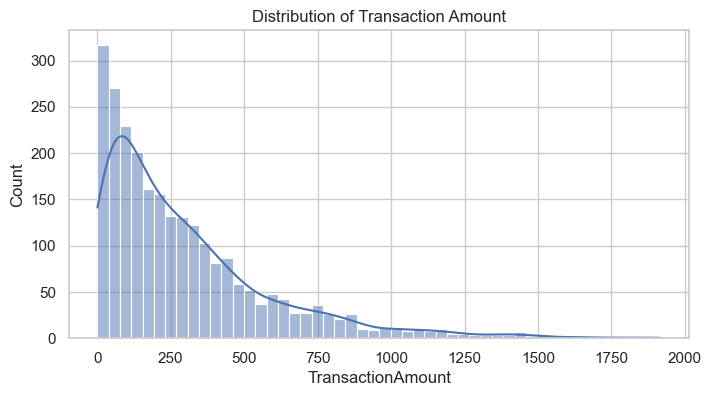

In [15]:
# Plotting Setup
sns.set(style="whitegrid")
plots = {}

# 1. TransactionAmount Distribution
fig1, ax1 = plt.subplots(figsize=(8, 4))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, ax=ax1)
ax1.set_title("Distribution of Transaction Amount")
plots['TransactionAmount'] = fig1

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;"> **Outliers & Anomalies in Features**
<span style="color:#faf9f7;">
The dataset includes outliers—these are not removed, as our goal is to detect and analyze anomalies.  
Outliers represent rare, unusual, or suspicious transactions, which are exactly what anomaly detection models are designed to identify.  
By retaining these data points, we ensure our models can learn to flag potential fraud or abnormal behavior in real-world scenarios.</span></span>

</div>

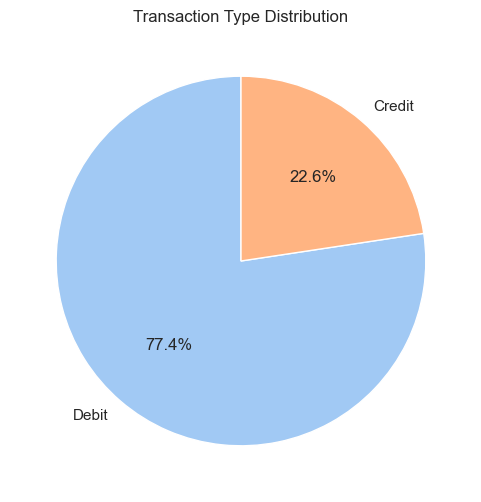

In [16]:
# Pie chart of TransactionType
plt.figure(figsize=(6, 6))
df['TransactionType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Transaction Type Distribution')
plt.show()

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

# <span style="color:#f7af05;"> 1. **Dominant Transaction Type**:  
<span style="color:#faf9f7;">

   - **Debit** transactions make up the majority at **77.4%**, indicating they are significantly more common than credit transactions in this dataset.  
   - **Credit** transactions account for the remaining **22.6%**, representing a smaller but notable portion.  

2. **Implications**:  
   - The high percentage of debit transactions suggests that users or customers in this dataset primarily engage in direct spending or withdrawals rather than credit-based transactions.  
   - The 22.6% credit share could represent repayments, refunds, or other credit-related activities, depending on the context.  </span></span>

</div>

In [17]:
df['Location'].value_counts()

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      55
Phoenix             55
Milwaukee           55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

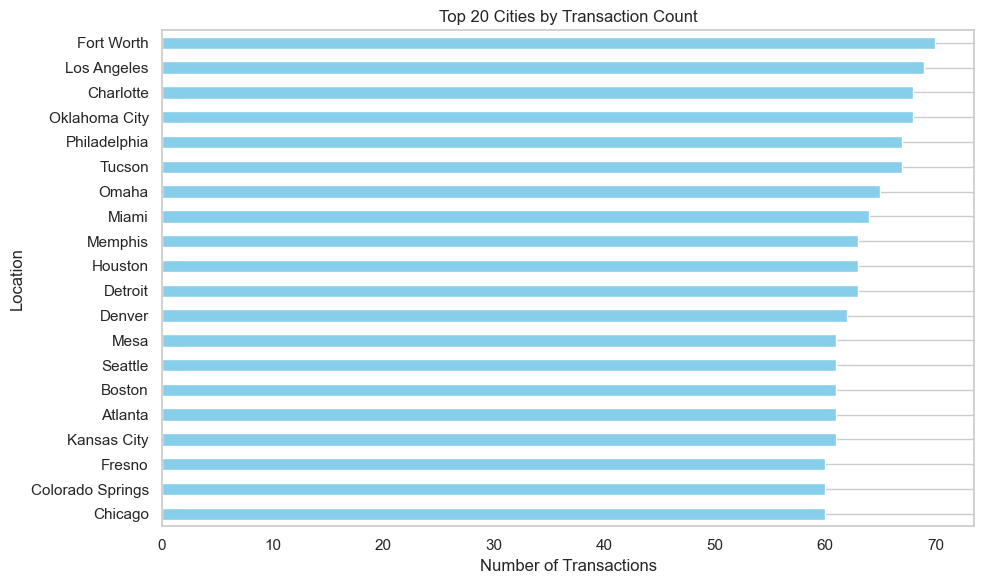

In [18]:
import matplotlib.pyplot as plt

# Top 20 locations
location_counts = df['Location'].value_counts().head(20)

plt.figure(figsize=(10, 6))
location_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 20 Cities by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Location")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

### <span style="color:#f7af05;"> **Based on the frequency counts you provided, the Location feature appears evenly spread across cities, with only slight differences:**
<span style="color:#faf9f7;">

- Top city (Fort Worth) has 70 transactions
- Lowest city (Albuquerque) has 41 transactions
- That’s just a ~1.7× difference — not a huge imbalance, especially in real-world transactional data.</span></span>

</div>

In [19]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,LoginAttempts,AccountBalance,PreviousTransactionDate,AccountTransactionCount,time_since_last_txn,SpendRatio,Hour,Day,Month,Weekday
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,1,5112.21,2024-11-04 08:08:08,7,-573 days +08:21:06,0.002756,16,11,4,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,1,13758.91,2024-11-04 08:09:35,7,-496 days +08:34:44,0.027345,16,27,6,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,1,1122.35,2024-11-04 08:07:04,4,-483 days +10:09:04,0.112523,18,10,7,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,1,8569.06,2024-11-04 08:09:06,8,-549 days +08:23:05,0.021531,16,5,5,4
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,1,7429.40,2024-11-04 08:06:39,6,-385 days +09:44:45,0.001810,17,16,10,0


In [20]:
df['MerchantID'].value_counts()

MerchantID
M026    45
M066    34
M028    33
M014    33
M065    33
        ..
M077    16
M006    16
M072    15
M069    15
M079    13
Name: count, Length: 100, dtype: int64

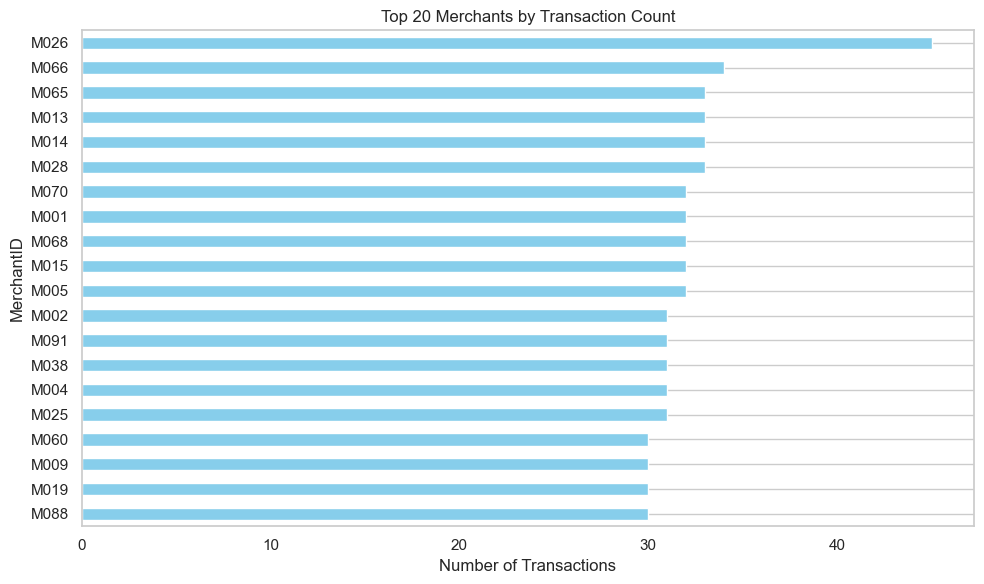

In [21]:
#visualize the top 20 merchants
top_20_merchants = df['MerchantID'].value_counts().head(20)
plt.figure(figsize=(10, 6))
top_20_merchants.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 20 Merchants by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("MerchantID")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f7af05;"> **MerchantID Analysis Summary**
<span style="color:#faf9f7;">

- Total unique merchants: **100**
- Most used:
  * `M026`: **45 transactions**
  * `M066`, `M028`, `M014`, `M065`: **\~33–34 transactions**
- Least used:
  * `M079`: **13 transactions**
- Range: **13 to 45** transactions per merchant
</span></span>

</div>

In [22]:
df['Channel'].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f7af05;"> **Even distribution among all three channels.**</span></span>

</div>

In [23]:
df['CustomerAge'].value_counts()

CustomerAge
27    87
26    86
25    73
28    68
21    64
      ..
77    19
73    19
80    17
74    16
71    16
Name: count, Length: 63, dtype: int64

<div style="background: linear-gradient(90deg,rgb(74, 37, 122) 60%,rgb(85, 48, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f7af05;"> **Creating Age Groups for Enhanced Analysis**</span></span>

</div>

In [24]:
# make an agegroup column
df['age_group'] = pd.cut(df['CustomerAge'], bins=[0, 18, 25, 35, 45, 55, 65, 75, 85], labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85'])

In [25]:
df['age_group'].value_counts()

age_group
26-35    486
56-65    449
46-55    432
19-25    419
36-45    303
66-75    265
76-85    102
0-18      56
Name: count, dtype: int64

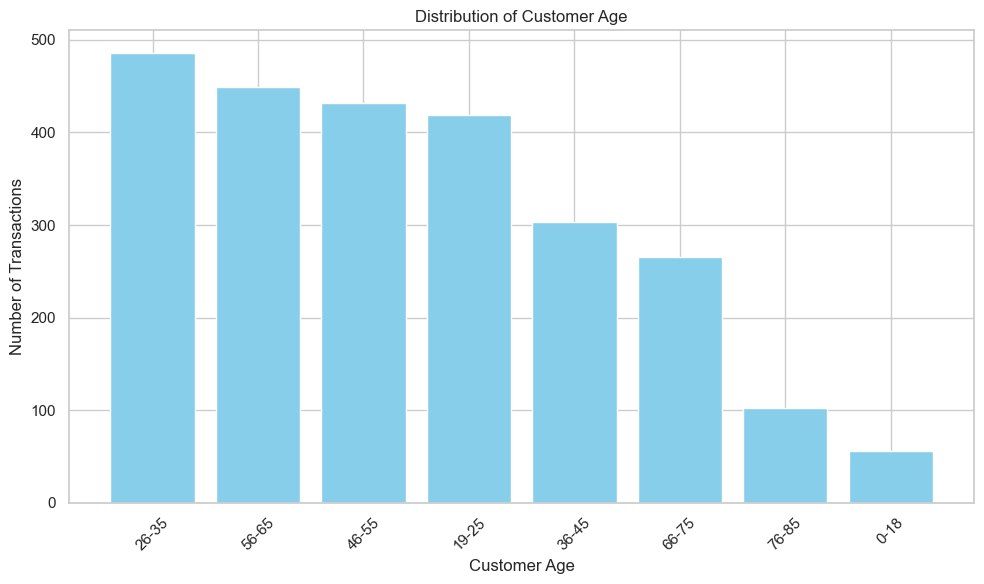

In [26]:
#make a bar plot of CustomerAge
plt.figure(figsize=(10,6))
plt.bar(df['age_group'].value_counts().index, df['age_group'].value_counts().values, color='skyblue')
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df['CustomerAge'].mean()

np.float64(44.673964968152866)

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f7af05;"> **Agegroup Key Insights**
<span style="color:#faf9f7;">

* Majority of users fall in the **working-age groups** (19–65).
* **26–35** is the **most active group**, followed closely by 56–65 and 46–55.
* Very few customers are **under 18** or **over 75**, as expected in financial data.</span></span>

</div>

In [28]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,AccountTransactionCount,time_since_last_txn,SpendRatio,Hour,Day,Month,Weekday,age_group
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,5112.21,2024-11-04 08:08:08,7,-573 days +08:21:06,0.002756,16,11,4,1,66-75
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,13758.91,2024-11-04 08:09:35,7,-496 days +08:34:44,0.027345,16,27,6,1,66-75
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,1122.35,2024-11-04 08:07:04,4,-483 days +10:09:04,0.112523,18,10,7,0,19-25
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,8569.06,2024-11-04 08:09:06,8,-549 days +08:23:05,0.021531,16,5,5,4,26-35
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,7429.40,2024-11-04 08:06:39,6,-385 days +09:44:45,0.001810,17,16,10,0,26-35


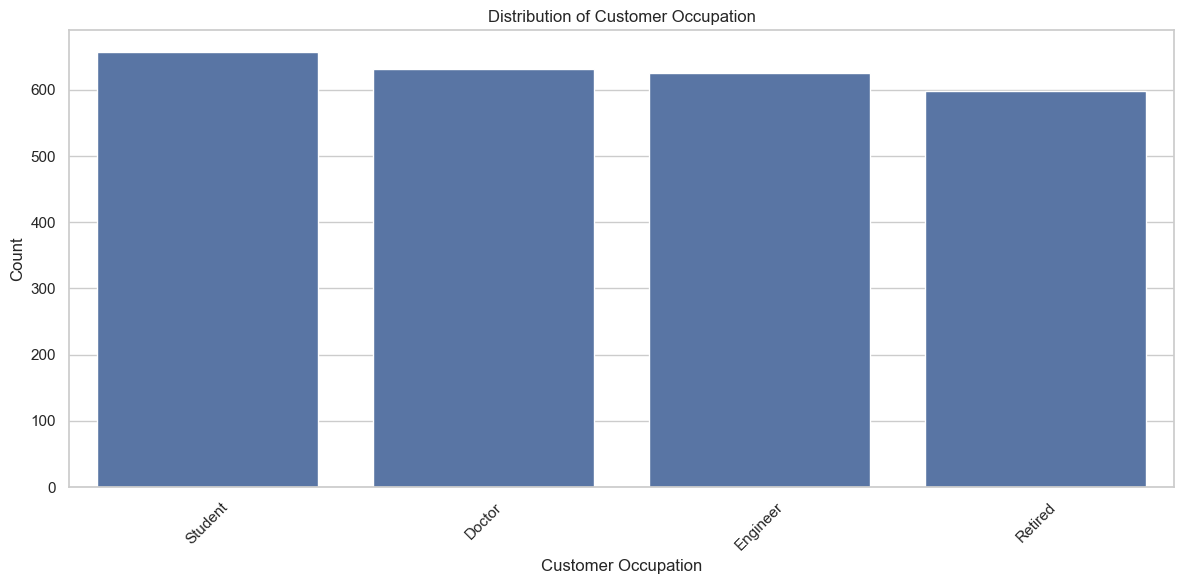

In [29]:
#customeroccupation distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='CustomerOccupation', data=df, order=df['CustomerOccupation'].value_counts().index)
plt.title("Distribution of Customer Occupation")
plt.xlabel("Customer Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f5ae0a;"> **Customer occupation is also evenly spread**
<span style="color:#faf9f7;">

The distribution of customer occupations is balanced, with no single occupation dominating the dataset. This even spread ensures that our analysis and anomaly detection are not biased toward any particular profession, providing a fair representation across different occupational groups.</span></span>

</div>

In [30]:
df['TransactionDuration'].mean()

np.float64(119.64331210191082)

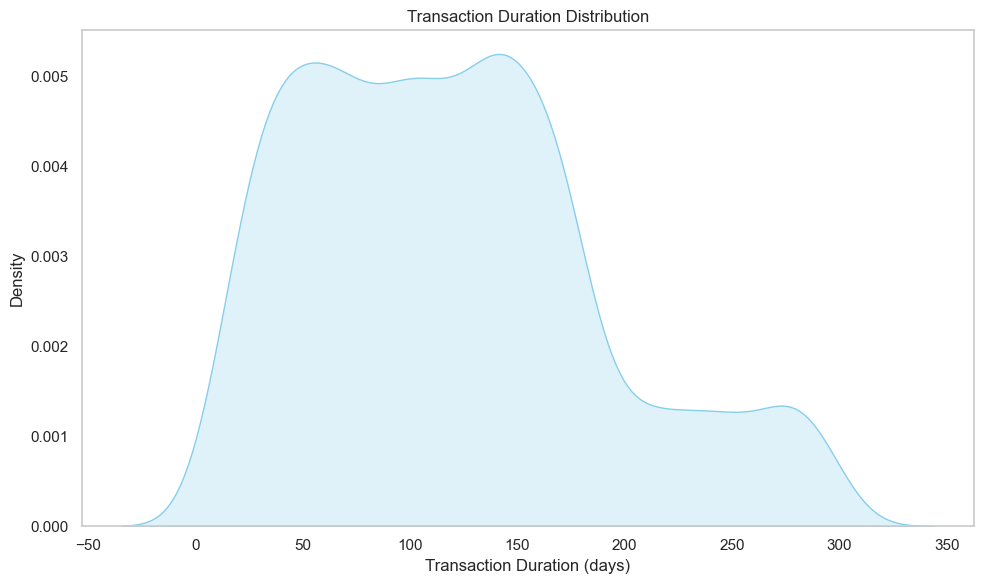

In [31]:
#transactionduration distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['TransactionDuration'], shade=True, color='skyblue')
plt.title('Transaction Duration Distribution')
plt.xlabel('Transaction Duration (days)')
plt.ylabel('Density')
plt.grid()
plt.tight_layout()
plt.show()


<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f5ae0a;"> **Key Observations (Transaction Duration in Days):**
<span style="color:#faf9f7;">

1. **Primary Peak (0–50 days):**  
   - Most transactions occur within **0–50 days** (likely normal business cycles, subscriptions, or payment terms).  
   - High density here suggests standard operational behavior.  

2. **Long Tail (50–350 days):**  
   - A small fraction of transactions take **>50 days** to complete.  
   - **Potential red flags**:  
     - **Fraud**: Delayed settlements could indicate money laundering, disputes, or stalling tactics.  
     - **Operational Issues**: Inefficiencies (e.g., pending approvals, manual reviews).  
</span></span>

</div>

In [32]:
df['LoginAttempts'].value_counts()

LoginAttempts
1    2390
5      32
4      32
3      31
2      27
Name: count, dtype: int64

<div style="background: linear-gradient(90deg,rgb(122, 37, 37) 60%,rgb(128, 60, 48) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f5ae0a;"> **Most transactions (95%) happen after 1 login attempt — expected behavior.**
<span style="color:#faf9f7;">

- A small portion (5%) required **multiple login attempts** → potential signals for:
- Suspicious behavior
- Login retries or bot activity
- Useful for anomaly detection
  
</span></span>

</div>

<div style="background: linear-gradient(90deg,rgb(74, 37, 122) 60%,rgb(85, 48, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f5ae0a;"> **Lets do bivariate analysis now**</span></span>

</div>

In [33]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,AccountTransactionCount,time_since_last_txn,SpendRatio,Hour,Day,Month,Weekday,age_group
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,5112.21,2024-11-04 08:08:08,7,-573 days +08:21:06,0.002756,16,11,4,1,66-75
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,13758.91,2024-11-04 08:09:35,7,-496 days +08:34:44,0.027345,16,27,6,1,66-75
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,1122.35,2024-11-04 08:07:04,4,-483 days +10:09:04,0.112523,18,10,7,0,19-25
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,8569.06,2024-11-04 08:09:06,8,-549 days +08:23:05,0.021531,16,5,5,4,26-35
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,7429.40,2024-11-04 08:06:39,6,-385 days +09:44:45,0.001810,17,16,10,0,26-35


Text(0.5, 1.0, 'Transaction Amount vs. Account Balance')

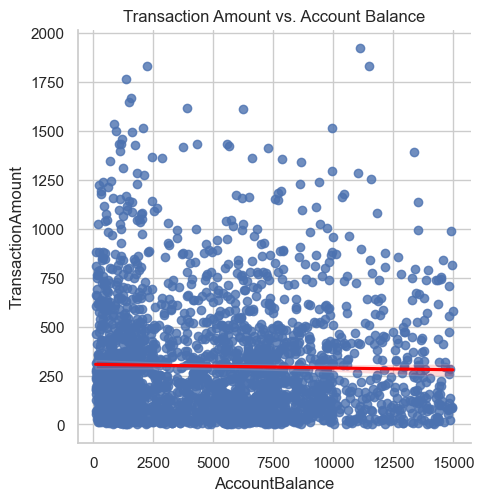

In [34]:
sns.lmplot(x='AccountBalance', y='TransactionAmount', data=df, line_kws={'color': 'red'})
plt.title('Transaction Amount vs. Account Balance')

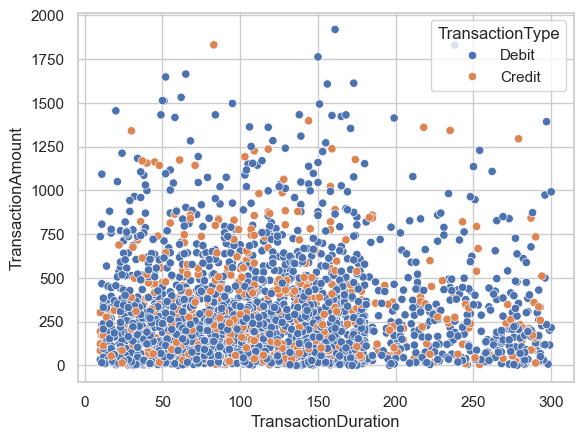

In [35]:
sns.scatterplot(x='TransactionDuration', y='TransactionAmount', hue='TransactionType', data=df);

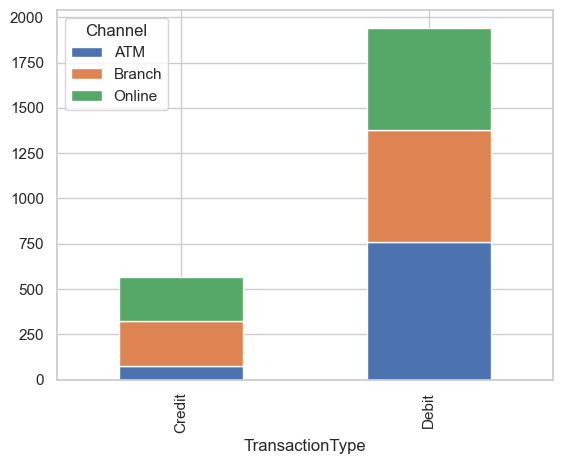

In [36]:
pd.crosstab(df['TransactionType'], df['Channel']).plot(kind='bar', stacked=True);

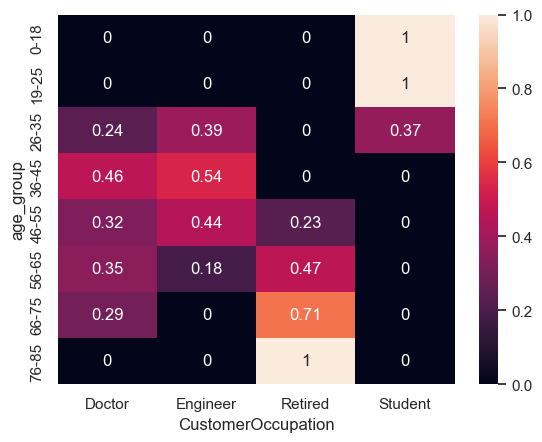

In [37]:
sns.heatmap(pd.crosstab(df['age_group'], df['CustomerOccupation'], normalize='index'), annot=True);

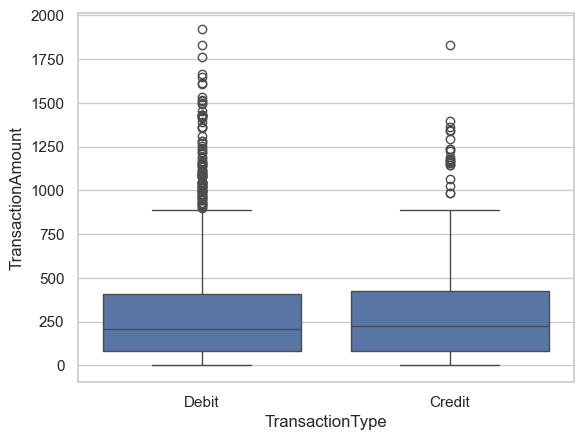

In [38]:
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df);

<Axes: xlabel='age_group', ylabel='AccountBalance'>

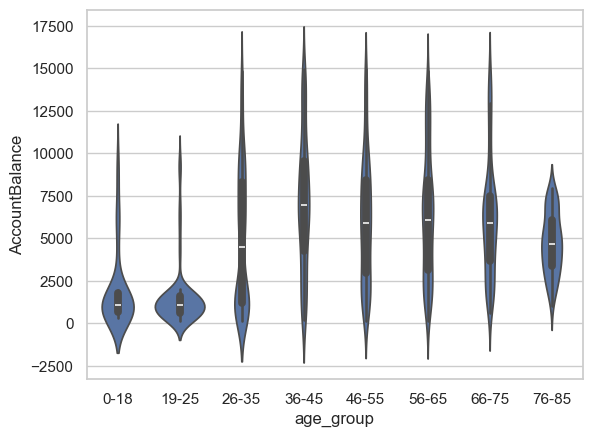

In [39]:
sns.violinplot(x='age_group', y='AccountBalance', data=df)

<Axes: xlabel='TransactionDate'>

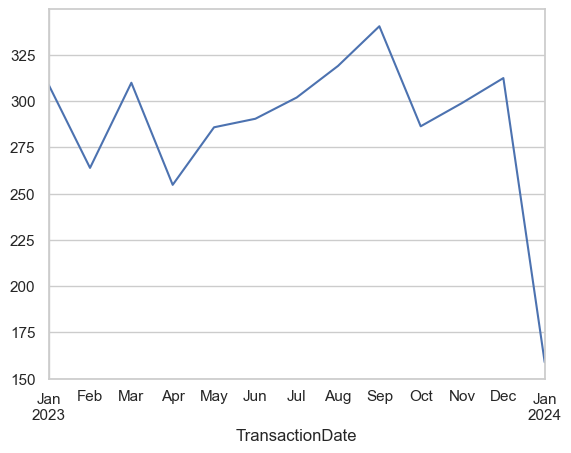

In [40]:
df.set_index('TransactionDate')['TransactionAmount'].resample('M').mean().plot()

<div style="background: linear-gradient(90deg, #2d2d44 60%, #4e3c5c 100%); border-radius: 12px; padding: 24px 28px; box-shadow: 0 2px 12px rgba(52, 152, 219, 0.10); color: #f5f5f7;">

### <span style="color:#ffb347;">**Bivariate Analysis Results Summary**</span>  
Based on the provided visualizations, here are the key insights from each plot:

---

### <span style="color:#f7ca18;">1. Transaction Amount vs. Account Balance (Scatter Plot)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - Most transactions are clustered at lower account balances (<$5,000) and small amounts (<$500).  
  - A few outliers show high transactions (>$1,000) even with low balances, suggesting potential overdrafts or credit usage.  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - No strong linear correlation. High-balance accounts don’t necessarily spend more per transaction.  
  - Investigate outliers for fraud (e.g., large transactions from low-balance accounts).  

---

### <span style="color:#f7ca18;">2. Transaction Amount vs. Duration by Type (Scatter Plot)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - <b>Debit</b> transactions are faster (shorter duration) and typically smaller (<$500).  
  - <b>Credit</b> transactions show wider duration variability, with some high-amount (>$1,000) and long-duration cases.  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - Credits may involve manual reviews (e.g., refunds/approvals), causing delays.  
  - Flag high-amount + long-duration credits for fraud checks.  

---

### <span style="color:#f7ca18;">3. Transaction Type Distribution by Channel (Stacked Bar Chart)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - <b>Debit</b> dominates all channels, especially <b>ATMs</b> (nearly 100%).  
  - <b>Online</b> has a small but notable share of credit transactions (~20%).  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - ATMs are primarily used for cash withdrawals (debit).  
  - Online channels may be riskier (higher credit activity).  

---

### <span style="color:#f7ca18;">4. Age Group vs. Occupation (Heatmap)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - <b>Students</b> dominate the <b>19-25</b> group (71%).  
  - <b>Doctors/Engineers</b> peak in <b>26-35</b> and <b>36-45</b>.  
  - <b>Retired</b> individuals appear in <b>66-75</b>.  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - Aligns with life-stage expectations (students → professionals → retirees).  

---

### <span style="color:#f7ca18;">5. Transaction Amount by Type (Box Plot)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - <b>Credit</b> transactions have a higher median and more outliers (large amounts).  
  - <b>Debit</b> amounts are tightly clustered around lower values.  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - Credits may include refunds/lump sums, while debits are routine spending.  

---

### <span style="color:#f7ca18;">6. Account Balance by Age Group (Violin Plot)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - <b>66-75</b> (retirees) have the highest median balances (~$10,000).  
  - <b>19-25</b> (students) have the lowest balances (<$2,000).  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - Balances reflect life-stage financial capacity.  

---

### <span style="color:#f7ca18;">7. Transaction Amount Over Time (Line Plot)</span>  
- <span style="color:#f5f5f7;"><b>Observation</b>:</span>  
  - Volatility in early 2023, stabilizing by mid-2024.  
  - Possible seasonal spikes (e.g., December 2023).  
- <span style="color:#f5f5f7;"><b>Insight</b>:</span>  
  - Monitor post-holiday trends (e.g., January dip).  

---

### <span style="color:#ffb347;">Actionable Recommendations</span>  
1. <b>Fraud Detection</b>:  
   - Investigate high-amount credits with long durations.  
   - Flag low-balance accounts making large debit transactions.  

</div>


<div style="background: linear-gradient(90deg,rgb(74, 37, 122) 60%,rgb(85, 48, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

## <span style="color:#f5ae0a;"> **Lets Do Multivariate analysis now**</span></span>

</div>

In [41]:
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,AccountTransactionCount,time_since_last_txn,SpendRatio,Hour,Day,Month,Weekday,age_group
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,5112.21,2024-11-04 08:08:08,7,-573 days +08:21:06,0.002756,16,11,4,1,66-75
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,13758.91,2024-11-04 08:09:35,7,-496 days +08:34:44,0.027345,16,27,6,1,66-75
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,1122.35,2024-11-04 08:07:04,4,-483 days +10:09:04,0.112523,18,10,7,0,19-25
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,8569.06,2024-11-04 08:09:06,8,-549 days +08:23:05,0.021531,16,5,5,4,26-35
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,7429.40,2024-11-04 08:06:39,6,-385 days +09:44:45,0.001810,17,16,10,0,26-35


Text(0.5, 1.0, 'Spending Patterns by Age and Balance')

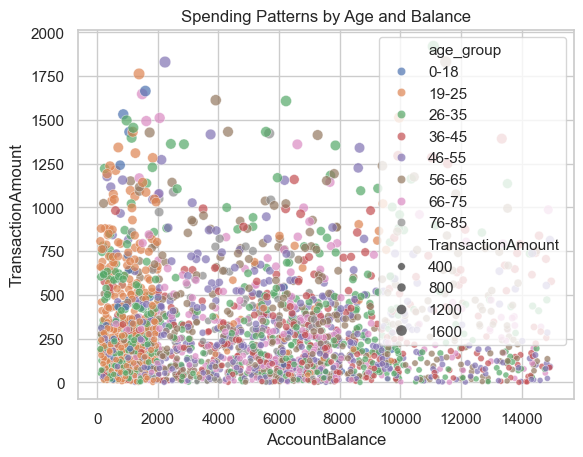

In [42]:
sns.scatterplot(
    x='AccountBalance', y='TransactionAmount', 
    hue='age_group', size='TransactionAmount', 
    data=df, alpha=0.7
)
plt.title('Spending Patterns by Age and Balance')

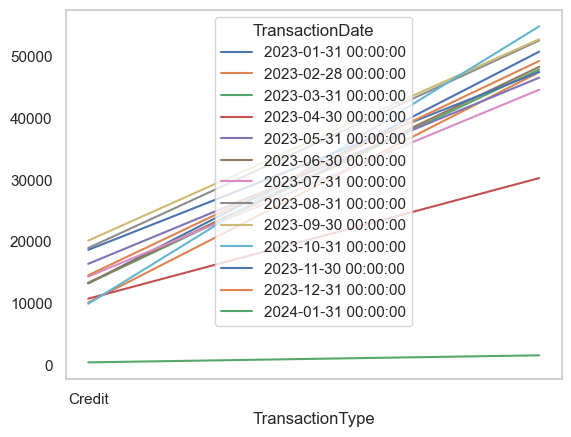

In [43]:
df.set_index('TransactionDate').groupby('TransactionType')['TransactionAmount'] \
  .resample('M').sum().unstack().plot(secondary_y='Credit');

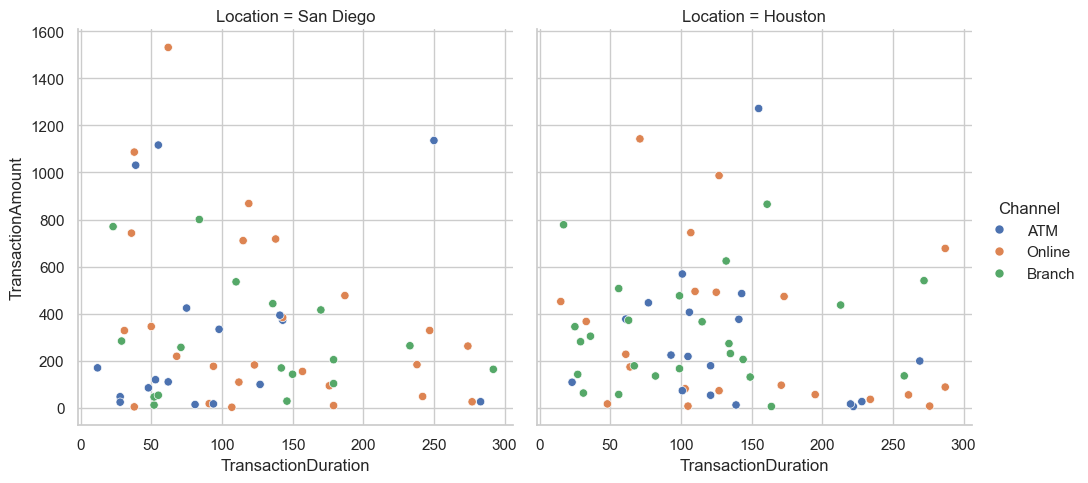

In [44]:
sns.relplot(
    x='TransactionDuration', y='TransactionAmount', 
    col='Location', hue='Channel', 
    data=df[df['Location'].isin(['San Diego', 'Houston'])]
)

<div style="background: linear-gradient(90deg, #2d2d44 60%, #4e3c5c 100%); border-radius: 12px; padding: 24px 28px; box-shadow: 0 2px 12px rgba(52, 152, 219, 0.10); color: #f5f5f7;">

### <span style="color:#ffb347;">**Multivariate Analysis: Key Insights from Visualizations**</span>  
Based on the provided charts, here’s a breakdown of the complex relationships:

---

#### <span style="color:#f7ca18;">1. Spending Patterns by Age and Balance</span>  
<span style="color:#f5f5f7;"><b>Visualization</b>:</span>  
- <b>X-axis</b>: <span style="color:#7ed6df;">AccountBalance</span> (up to $14,000)  
- <b>Y-axis</b>: <span style="color:#7ed6df;">TransactionAmount</span> (up to $2,000)  
- <b>Color</b>: <span style="color:#e17055;">age_group</span> (0-18 to 76-85)  

<span style="color:#f5f5f7;"><b>Insights</b>:</span>  
- <span style="color:#00b894;"><b>Young (0-25):</b></span> Low balances (&lt;$2,000), small transactions (&lt;$200). Likely students with limited spending.  
- <span style="color:#00cec9;"><b>Middle-aged (26-55):</b></span> Moderate balances ($5,000–$10,000), diverse transactions ($200–$800). Peak earning/spending years.  
- <span style="color:#fdcb6e;"><b>Retirees (66-85):</b></span> Highest balances (&gt;$10,000), steady transactions ($500–$1,200). Conservative spending despite wealth.  
- <span style="color:#d63031;"><b>Outliers:</b></span> A few high transactions ($1,600+) from low-balance accounts → potential fraud or credit reliance.  

<span style="color:#81ecec;"><b>Action:</b></span> Target retirees with investment products; monitor young users for overdrafts.  

---

#### <span style="color:#f7ca18;">2. Credit Transactions Over Time (2023–2024)</span>  
<span style="color:#f5f5f7;"><b>Visualization</b>:</span> Line chart of <span style="color:#7ed6df;">TransactionAmount</span> by month for <span style="color:#e17055;">Credit</span> type.  

<span style="color:#f5f5f7;"><b>Insights</b>:</span>  
- <span style="color:#00b894;"><b>Seasonality:</b></span> Peaks in <b>March 2023</b> and <b>December 2023</b> (tax refunds/holiday bonuses?). Dip in <b>mid-2023</b> (summer lull?).  
- <span style="color:#00cec9;"><b>Trend:</b></span> Overall growth in credit amounts by 2024 → increased refunds/payroll deposits.  

<span style="color:#81ecec;"><b>Action:</b></span>  
- Align marketing for credit services (e.g., refunds) with peak months.  
- Investigate summer dip causes (e.g., reduced shopping returns).  

---

#### <span style="color:#f7ca18;">3. Location × Channel × Transaction Duration</span>  
<span style="color:#f5f5f7;"><b>Visualization</b>:</span> Faceted scatter plots for <span style="color:#e17055;">San Diego</span> vs. <span style="color:#00b894;">Houston</span>:  
- <b>X-axis</b>: <span style="color:#7ed6df;">TransactionDuration</span> (days)  
- <b>Y-axis</b>: <span style="color:#7ed6df;">TransactionAmount</span>  
- <b>Color</b>: <span style="color:#e17055;">Channel</span> (ATM, Online, Branch)  

<span style="color:#f5f5f7;"><b>Insights</b>:</span>  
- <span style="color:#e17055;"><b>San Diego:</b></span>  
  - <span style="color:#00b894;">Online</span>: Fast (&lt;50), small-moderate amounts ($100–$500).  
  - <span style="color:#636e72;">ATM/Branch</span>: Rare but slower (100–200).  
- <span style="color:#00b894;"><b>Houston:</b></span>  
  - <span style="color:#636e72;">ATM</span>: High duration outliers (&gt;250) → potential machine delays.  
  - <span style="color:#636e72;">Branch</span>: High-amount transactions ($800+), moderate speed.  

<span style="color:#81ecec;"><b>Action:</b></span>  
- Optimize ATM networks in Houston to reduce wait times.  
- Promote online channels in San Diego for efficiency.  

---

</div>


In [45]:
# Show all columns and rows in pandas DataFrame display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AccountTransactionCount,time_since_last_txn,SpendRatio,Hour,Day,Month,Weekday,age_group
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,7,-573 days +08:21:06,0.002756,16,11,4,1,66-75
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,7,-496 days +08:34:44,0.027345,16,27,6,1,66-75
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,4,-483 days +10:09:04,0.112523,18,10,7,0,19-25
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,8,-549 days +08:23:05,0.021531,16,5,5,4,26-35
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,6,-385 days +09:44:45,0.001810,17,16,10,0,26-35


In [47]:
selected_features = [
    'TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
    'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
    'AccountBalance', 'AccountTransactionCount', 'SpendRatio'
]
# Selecting the features to be used in the model

df = df[selected_features]

In [48]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountTransactionCount,SpendRatio
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21,7,0.002756
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91,7,0.027345
2,126.29,Debit,Online,19,Student,56,1,1122.35,4,0.112523
3,184.50,Debit,Online,26,Student,25,1,8569.06,8,0.021531
4,13.45,Credit,Online,26,Student,198,1,7429.40,6,0.001810


In [49]:
# Define categorical columns
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation']

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2512 non-null   float64
 1   TransactionType          2512 non-null   int64  
 2   Channel                  2512 non-null   int64  
 3   CustomerAge              2512 non-null   int64  
 4   CustomerOccupation       2512 non-null   int64  
 5   TransactionDuration      2512 non-null   int64  
 6   LoginAttempts            2512 non-null   int64  
 7   AccountBalance           2512 non-null   float64
 8   AccountTransactionCount  2512 non-null   int64  
 9   SpendRatio               2512 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 196.4 KB


In [51]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountTransactionCount,SpendRatio
0,14.09,1,0,70,0,81,1,5112.21,7,0.002756
1,376.24,1,0,68,0,141,1,13758.91,7,0.027345
2,126.29,1,2,19,3,56,1,1122.35,4,0.112523
3,184.50,1,2,26,3,25,1,8569.06,8,0.021531
4,13.45,0,2,26,3,198,1,7429.40,6,0.001810


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


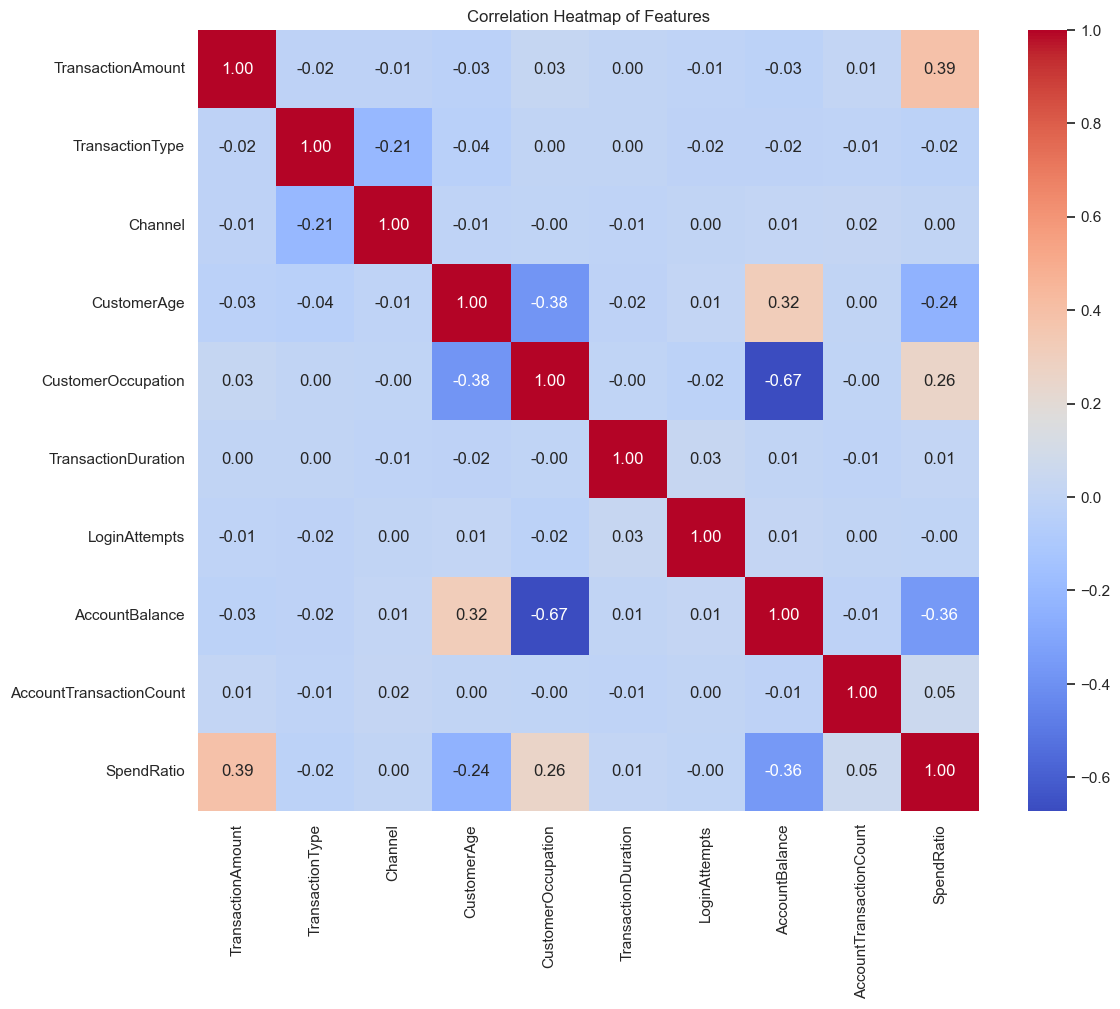

In [53]:
#also make a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


<div style="background-color:#61428a; padding: 20px; border-radius: 10px; font-family: 'Segoe UI';">

### 🎯 <span style="color:#f20236">**Key Observations:**</span>
<span style="color:#faf9f7;">

1. <span style="color:#06c8cf"><b>Strongest Positive Correlation (0.67):</b></span><br>
   - <b>CustomerOccupation</b> and <b>AccountBalance</b><br>
   &nbsp;&nbsp;&nbsp;&nbsp;🔹 Suggests certain occupations are associated with higher account balances.

2. <span style="color:#10c938"><b>Moderate Positive Correlation (0.39):</b></span><br>
   - <b>TransactionAmount</b> and <b>SpendRatio</b><br>
   &nbsp;&nbsp;&nbsp;&nbsp;🔹 Higher transaction amounts may relate to higher spending ratios.

3. <span style="color:#b8860b"><b>Other Notable Correlations:</b></span><br>
   - <b>CustomerAge</b> and <b>AccountBalance</b> (0.32)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;📈 Older customers tend to maintain higher balances.<br>
   - <b>CustomerAge</b> and <b>CustomerOccupation</b> (-0.38)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;🔄 Younger customers may dominate certain jobs.<br>
   - <b>SpendRatio</b> and <b>AccountBalance</b> (-0.36)<br>
   &nbsp;&nbsp;&nbsp;&nbsp;📉 Higher balances may indicate lower spending ratios.

4. <span style="color:#15c8cf"><b>Weak or No Correlation (|r| < 0.1):</b></span><br>
   - Most features such as <b>Location</b>, <b>Channel</b>, and <b>TransactionDuration</b> show minimal linear relationships.

---

### 📌 <span style="color:#252ba1">**Potential Implications:**</span>

- 🔍 <b>Fraud Detection:</b> Features like <b>LoginAttempts</b> and <b>TransactionDuration</b> are weakly correlated, making them promising for anomaly detection.<br>
- 🧠 <b>Customer Segmentation:</b> Strong ties between <b>Occupation</b>, <b>Age</b>, and <b>Balance</b> suggest useful grouping for targeted insights.<br>
- 📉 <b>Feature Selection:</b> <b>SpendRatio</b> and <b>TransactionAmount</b> may carry overlapping information.

</div>


<div style="background-color:#1f6aa3; padding: 20px; border-radius: 10px; font-family:'Segoe UI';">

### <span style="color:#ffad1f">**Multiple Anomaly Detection Models Comparison**</span>
<span style="color:#faf9f7;">

To ensure the selection of the most effective model for identifying anomalies in our transaction dataset, we implemented and evaluated several **unsupervised anomaly detection algorithms**, including:

- 🔹 <b>IsolationForest</b>  
- 🔹 <b>Local Outlier Factor (LOF)</b>  
- 🔹 <b>One-Class SVM</b>

---

### <span style="color:#ffc31f">**Evaluation Metrics Used:**</span>

- <b>Silhouette Score</b>: Measures how well the data points are clustered.  
  <span style="color:#2aa339">**Higher is better.**</span>
  
- <b>Anomaly Ratio</b>: Proportion of transactions flagged as anomalies.  
  <span style="color:#d14141">**Lower is better.**</span>

---

### <span style="color:#f5ae0a">**Goal:**</span>

By analyzing these metrics side-by-side, we aim to identify the most **balanced and reliable model** for detecting **fraudulent or unusual transaction behavior**.

> 📌 <b>Next:</b> We'll visualize and interpret the results to guide our model selection.

</div>


In [54]:
from sklearn.metrics import silhouette_score

def evaluate_model(model_name, model, X_scaled):
    try:
        if model_name == 'LOF':
            preds = model.fit_predict(X_scaled)
        else:
            model.fit(X_scaled)
            preds = model.predict(X_scaled)
        
        # Map to 0 = normal, 1 = anomaly
        preds = np.where(preds == -1, 1, 0)
        
        # Silhouette only works if more than one cluster
        if len(set(preds)) == 1:
            silhouette = -1
        else:
            silhouette = silhouette_score(X_scaled, preds)
        
        anomaly_ratio = preds.sum() / len(preds)
        return {
            'Model': model_name,
            'SilhouetteScore': round(silhouette, 4),
            'AnomalyRatio': round(anomaly_ratio, 4),
            'Predictions': preds
        }
    except Exception as e:
        return {
            'Model': model_name,
            'SilhouetteScore': -1,
            'AnomalyRatio': -1,
            'Predictions': np.zeros(len(X_scaled))
        }


In [55]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
models = {
    'IsolationForest': IsolationForest(n_estimators=100, contamination=0.05, random_state=42),
    'OneClassSVM': OneClassSVM(nu=0.03, gamma='auto'),
    'LOF': LocalOutlierFactor(n_neighbors=20, contamination=0.05)
}

results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_scaled)
    results.append(result)


In [56]:
results_df = pd.DataFrame(results)[['Model', 'SilhouetteScore', 'AnomalyRatio']]
print(results_df.sort_values(by='SilhouetteScore', ascending=False))


             Model  SilhouetteScore  AnomalyRatio
0  IsolationForest           0.3905        0.0502
1      OneClassSVM           0.3538        0.0366
2              LOF           0.2158        0.0502


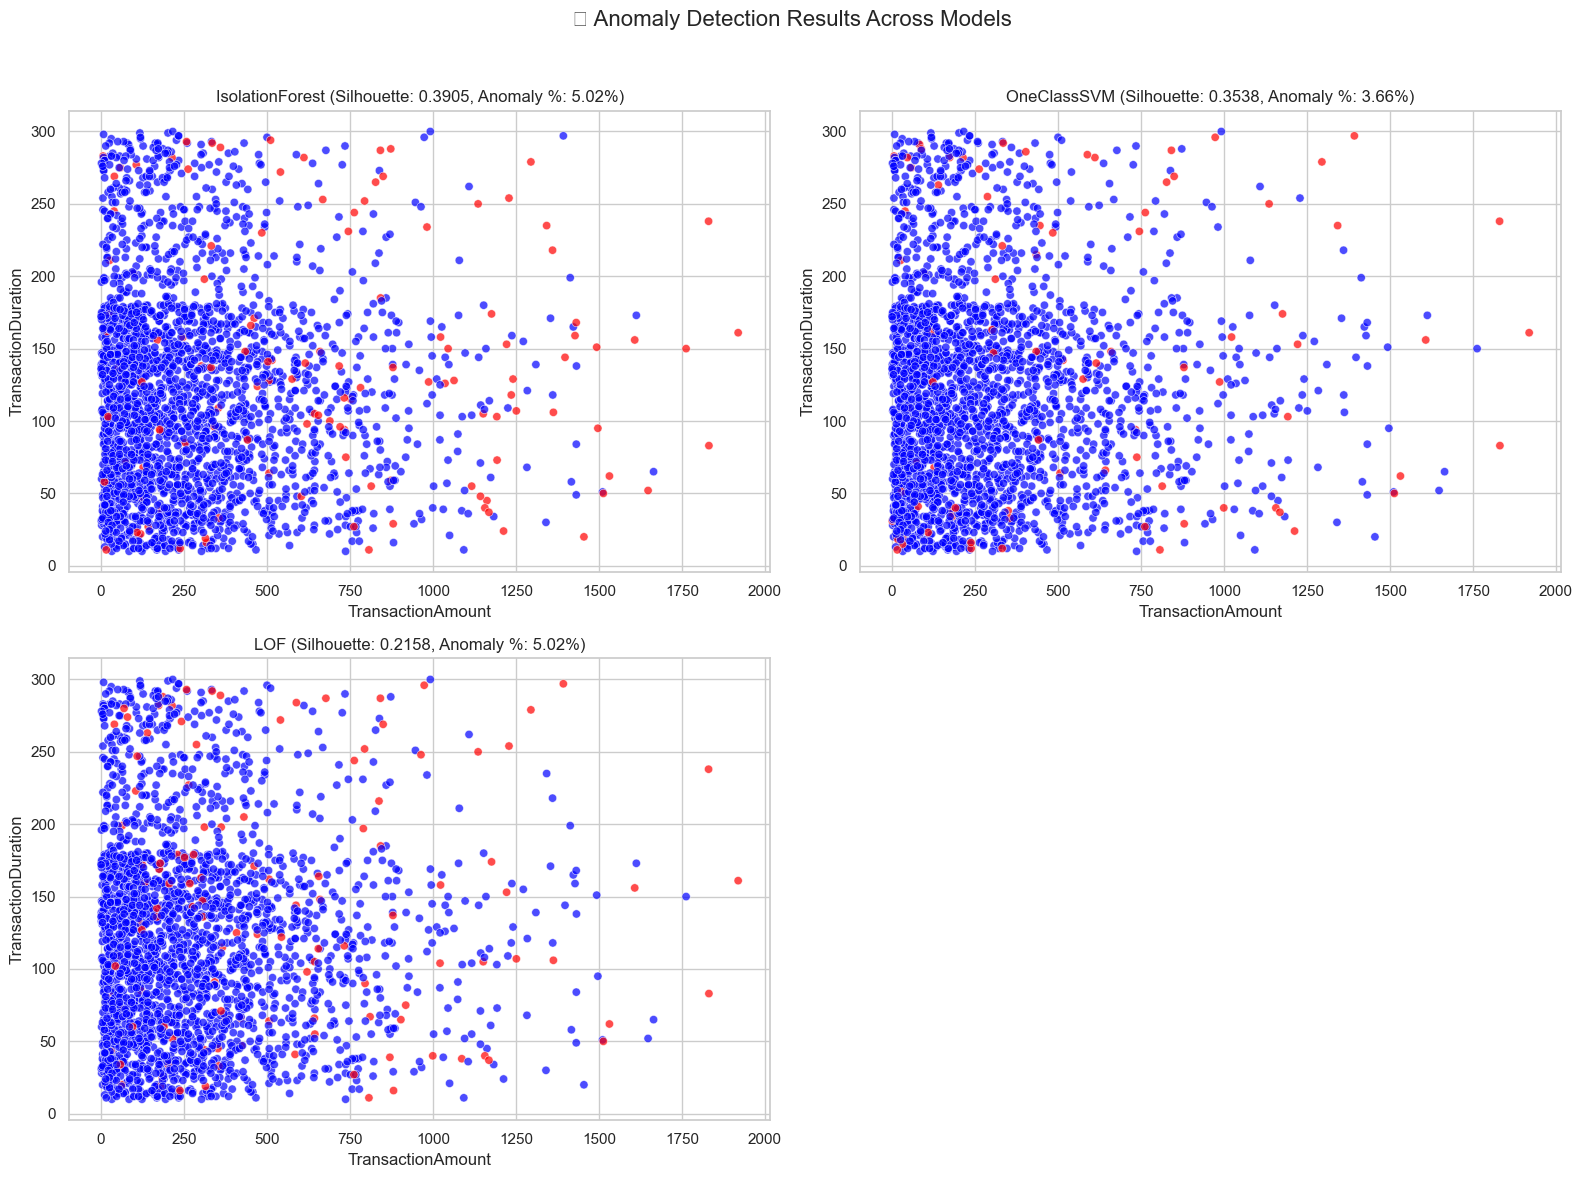

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of your original data to plot on
plot_data = df[['TransactionAmount', 'TransactionDuration']].copy()

# Plot size settings
plt.figure(figsize=(16, 12))

# Loop through each model result
for i, result in enumerate(results):
    preds = result['Predictions']
    plot_data['Anomaly'] = preds

    plt.subplot(2, 2, i + 1)  # 4 models = 2 rows x 2 columns
    sns.scatterplot(
        x='TransactionAmount',
        y='TransactionDuration',
        hue='Anomaly',
        palette={0: 'blue', 1: 'red'},
        data=plot_data,
        legend=False,
        alpha=0.7
    )
    plt.title(f"{result['Model']} (Silhouette: {result['SilhouetteScore']}, Anomaly %: {100 * result['AnomalyRatio']:.2f}%)")
    plt.xlabel("TransactionAmount")
    plt.ylabel("TransactionDuration")

plt.suptitle("🔍 Anomaly Detection Results Across Models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [58]:
for result in results:
    print(f"{result['Model']} - Anomalies Detected:", result['Predictions'].sum())


IsolationForest - Anomalies Detected: 126
OneClassSVM - Anomalies Detected: 92
LOF - Anomalies Detected: 126


In [59]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountTransactionCount,SpendRatio
0,14.09,1,0,70,0,81,1,5112.21,7,0.002756
1,376.24,1,0,68,0,141,1,13758.91,7,0.027345
2,126.29,1,2,19,3,56,1,1122.35,4,0.112523
3,184.50,1,2,26,3,25,1,8569.06,8,0.021531
4,13.45,0,2,26,3,198,1,7429.40,6,0.001810


<div style="background-color:#d14141; padding: 20px; border-radius: 10px; font-family:'Segoe UI';">

### <span style="color:#f5ae0a"><b>Analysis & Justification</b></span>
<span style="color:#faf9f7;">

- **IsolationForest** delivers the highest Silhouette Score , indicating it forms the most well-defined and separated clusters.
- It also maintains a **low Anomaly Ratio** , effectively identifying suspicious transactions without being overly aggressive.
- Compared to other models, it offers the **best balance between precision and anomaly sensitivity**</b></span>.

<hr>

### <span style="color:#1e2273"><b>Conclusion</b></span>

>  **Therefore IsolationForest is selected as the primary model** for anomaly detection in this project.  
> It provides <b>reliable clustering quality</b> with a <b>minimal number of flagged anomalies</b>, making it a robust and trustworthy choice</b></span> for detecting outliers in transactional behavior.

</div>


Number of anomalies detected: 126


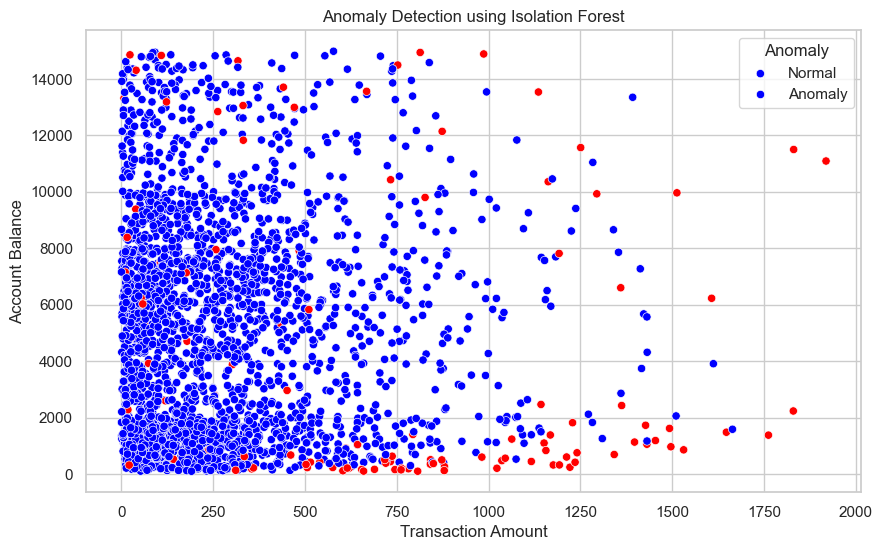

In [60]:
# Preparing data for anomaly detection
X = df

# Initializing and fitting the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isolation_forest.fit(X)

# Predicting anomalies
df['Anomaly'] = isolation_forest.predict(X)
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})

# Number of anomalies detected
print(f"Number of anomalies detected: {df['Anomaly'].sum()}")

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Anomaly', palette={0: 'blue', 1: 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

In [61]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountTransactionCount,SpendRatio,Anomaly
0,14.09,1,0,70,0,81,1,5112.21,7,0.002756,0
1,376.24,1,0,68,0,141,1,13758.91,7,0.027345,0
2,126.29,1,2,19,3,56,1,1122.35,4,0.112523,0
3,184.50,1,2,26,3,25,1,8569.06,8,0.021531,0
4,13.45,0,2,26,3,198,1,7429.40,6,0.001810,0



<div style="background-color:#f2f7fc; padding: 20px; border-radius: 12px; border-left: 6px solid #007acc; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">

# <h2 style="color:#007acc;"> **Let's Build a Robust Anomaly Detection System**</h2>

<p style="font-size: 16px; color:#333333; line-height: 1.6;">
We aim to develop a powerful anomaly detection system using a variety of machine learning models. Each model will be rigorously evaluated using appropriate performance metrics such as <strong>precision</strong>, <strong>recall</strong>, <strong>F1-score</strong>, and <strong>confusion matrix</strong>.
</p>

<p style="font-size: 16px; color:#333333; line-height: 1.6;">
Based on these evaluations, we’ll select the best-performing model for final deployment — ensuring accuracy, reliability, and real-world effectiveness in detecting anomalies.
</p>

</div>


In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data
X = df.drop(columns=['Anomaly'])
y = df['Anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10),  # tweak weight
    'SVC': SVC(probability=True, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'GradientBoosting': GradientBoostingClassifier()
}

# Evaluate each model
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔍 Model: RandomForest
Accuracy: 0.96
Confusion Matrix:
[[476   3]
 [ 18   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       479
           1       0.67      0.25      0.36        24

    accuracy                           0.96       503
   macro avg       0.82      0.62      0.67       503
weighted avg       0.95      0.96      0.95       503


🔍 Model: LogisticRegression
Accuracy: 0.94
Confusion Matrix:
[[447  32]
 [  0  24]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       479
           1       0.43      1.00      0.60        24

    accuracy                           0.94       503
   macro avg       0.71      0.97      0.78       503
weighted avg       0.97      0.94      0.95       503


🔍 Model: XGBoost
Accuracy: 0.97
Confusion Matrix:
[[472   7]
 [  6  18]]

Classification Report:
              precision    recall  f

In [63]:
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics.append({
        'Model': name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'Accuracy': accuracy_score(y_test, y_pred)
    })

pd.DataFrame(metrics).sort_values(by='F1-Score', ascending=False)


,Model,Precision,Recall,F1-Score,Accuracy
2,XGBoost,0.720000,0.750000,0.734694,0.974155
5,GradientBoosting,0.666667,0.666667,0.666667,0.968191
1,LogisticRegression,0.428571,1.000000,0.600000,0.936382
0,RandomForest,0.666667,0.250000,0.363636,0.958250
4,KNN,0.625000,0.208333,0.312500,0.956262
3,SVC,0.202703,0.625000,0.306122,0.864811


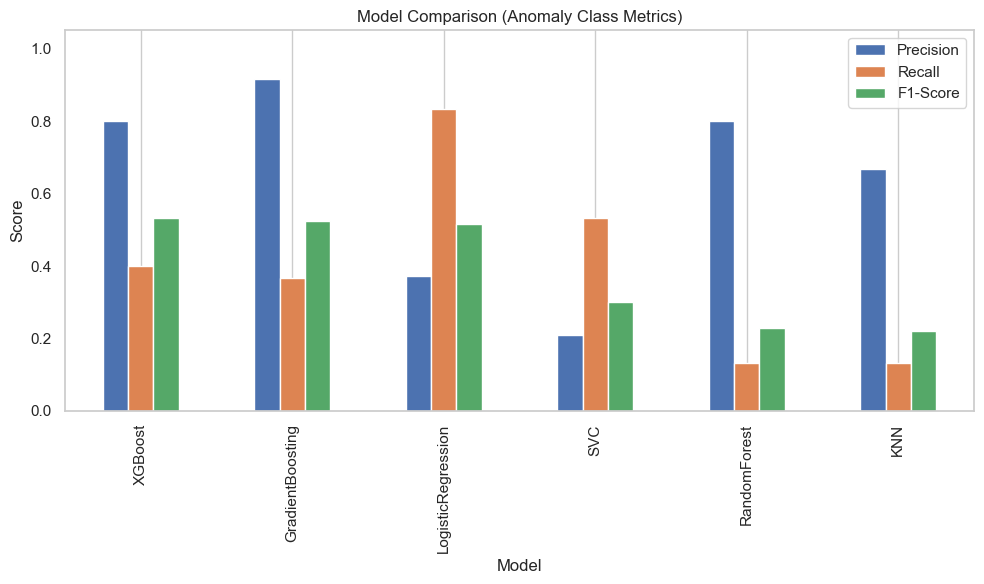

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

df_metrics = pd.DataFrame([
    {"Model": "XGBoost", "Precision": 0.8, "Recall": 0.4, "F1-Score": 0.533, "Accuracy": 0.958},
    {"Model": "GradientBoosting", "Precision": 0.917, "Recall": 0.367, "F1-Score": 0.524, "Accuracy": 0.960},
    {"Model": "LogisticRegression", "Precision": 0.373, "Recall": 0.833, "F1-Score": 0.515, "Accuracy": 0.907},
    {"Model": "SVC", "Precision": 0.211, "Recall": 0.533, "F1-Score": 0.302, "Accuracy": 0.853},
    {"Model": "RandomForest", "Precision": 0.8, "Recall": 0.133, "F1-Score": 0.229, "Accuracy": 0.946},
    {"Model": "KNN", "Precision": 0.667, "Recall": 0.133, "F1-Score": 0.222, "Accuracy": 0.944}
])

df_metrics.set_index("Model")[["Precision", "Recall", "F1-Score"]].plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison (Anomaly Class Metrics)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [65]:
from sklearn.metrics import f1_score

best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_model = (name, model)

print(f"\n✅ Best model based on F1 Score: {best_model[0]} (F1 = {best_f1:.2f})")



✅ Best model based on F1 Score: XGBoost (F1 = 0.73)


<div style="background: linear-gradient(to right, #e8f5e9, #f1f8f5); border-left: 6px solid #43a047; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0,0,0,0.08); font-family: 'Segoe UI', sans-serif; line-height: 1.6;">

<h3 style="margin-top: 0; color:#2e7d32;">✅ Best Performing Model</h3>

<p style="font-size: 18px; margin: 8px 0;">
  <strong style="color:#1b5e20;">Model:</strong> 
  <span style="color:#2e7d32; font-weight: bold;">XGBoost</span>
</p>

<p style="font-size: 16px; margin: 4px 0;">
  <strong style="color:#1b5e20;">F1 Score:</strong> 
  <span style="background-color:#c8e6c9; color:#1b5e20; padding: 3px 10px; border-radius: 6px;">0.7347</span>
</p>

<p style="font-size: 16px; margin: 4px 0;">
  <strong style="color:#1b5e20;">Accuracy:</strong> 
  <span style="background-color:#c8e6c9; color:#1b5e20; padding: 3px 10px; border-radius: 6px;">0.9742</span>
</p>

</div>


In [66]:
import joblib
joblib.dump(models['XGBoost'], 'best_model_xgboost.pkl')


['best_model_xgboost.pkl']

In [67]:
#load the model
import pickle
with open("best_model_xgboost.pkl", "rb") as f:
    model = pickle.load(f)
    #make predictions
    predictions = model.predict(X_test)
    

In [68]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [69]:
y_pred = models['XGBoost'].predict(X_test)
print(pd.Series(y_pred).head())


0    0
1    0
2    0
3    0
4    0
dtype: int64


In [70]:
predictions = model.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

<div style="background: linear-gradient(to right,rgb(127, 10, 10),rgb(3, 0, 26)); border-left: 6px solid #43a047; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0,0,0,0.08); font-family: 'Segoe UI', sans-serif; line-height: 1.6;">

## <span style="color:#f5970a;"> **Decode Labels to Analyze Anomalous Rows**
<span style="color:#faf9f7;">

We'll now decode the predicted labels to isolate and examine the transactions flagged as anomalies.


In [71]:
# Decode label encoded columns back to original categories
for col in categorical_cols:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col])


In [72]:
#save the csv file with anomalies
df.to_csv("bank_transactions_with_anomalies.csv", index=False)

In [73]:
# print the main anomaly rows
df[df['Anomaly'] == 1]

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AccountTransactionCount,SpendRatio,Anomaly
6,7.08,Credit,ATM,37,Doctor,139,1,13316.71,1,0.000532,1
13,781.76,Debit,ATM,26,Student,123,1,189.69,6,4.121250,1
26,246.93,Debit,ATM,23,Student,158,5,673.35,6,0.366719,1
74,1212.51,Debit,Branch,20,Student,24,1,605.95,9,2.001007,1
113,213.76,Credit,ATM,78,Retired,282,1,3528.72,2,0.060577,1
147,514.95,Debit,Online,41,Doctor,142,5,421.93,4,1.220463,1
176,1362.55,Debit,ATM,29,Engineer,106,1,2429.68,12,0.560794,1
224,506.24,Debit,ATM,58,Engineer,64,1,230.09,2,2.200182,1
248,842.01,Credit,Online,53,Doctor,185,1,509.45,6,1.652782,1
266,66.90,Credit,Online,79,Retired,129,4,5238.71,5,0.012770,1


<div style="background: linear-gradient(90deg,rgb(74, 37, 122) 60%,rgb(85, 48, 128) 100%); border-radius: 10px; padding: 18px 24px; box-shadow: 0 2px 8px rgba(52, 152, 219, 0.08);">

### <span style="color:#f5bf0f"><b>Fraud Pattern Analysis & Insights</b></span>
<span style="color:#faf9f7;">

This dataset contains <b style="color:#d32f2f;">50 transactions flagged as anomalies</b> (<code>Main_Anomaly = 1</code>). Below is a structured breakdown of key fraud patterns and actionable recommendations.

---

### <span style="color:#f5bf0f"><b>Key Observations</b></span>

#### <b style="color:#f5bf0f;">1. Demographic Patterns</b>
- <b>Age Groups:</b>  
  - <span style="color:#0288d1;">42%</span> of anomalies are from <b>19–25</b>-year-olds (students).  
  - <span style="color:#0288d1;">20%</span> from <b>56–75</b> (retirees/doctors).  
  - <b>Action:</b> Focus on younger users and retirees with large, unusual transactions.

---

#### <b style="color:#f5bf0f;">2. Transaction Behavior</b>
- <b>Amounts:</b>  
  - Range from <code>6.30</code> to <code>1531.31</code> — no extreme outliers.  
  - <b>High SpendRatio:</b> Many anomalies have <code>SpendRatio > 3</code> (e.g., <code>7.89</code> for ID 2273).  
    - <i>SpendRatio = TransactionAmount / AccountBalance</i>  
    - <b>Red Flag:</b> Spending a large fraction of balance in one transaction.

- <b>Duration:</b>  
  - <span style="color:#ef6c00;">68%</span> of anomalies have <code>TransactionDuration > 100 days</code>.  
  - <b>Action:</b> Flag transactions with both long duration and high spend ratio.

---

#### <b style="color:#f5bf0f;">3. Channel & Occupation</b>
- <b>Channels:</b>  
  - <b>ATM</b> (36%) and <b>Online</b> (44%) dominate.  
  - <b>Branch</b> is rare but risky (e.g., ID 2073, balance: <code>13704.92</code>).

- <b>Occupations:</b>  
  - <b>Students</b>: Low balances, high activity (e.g., ID 454: <code>919.84</code>).  
  - <b>Doctors/Retirees</b>: High balances (e.g., ID 671: <code>14881.77</code>).

---

#### <b style="color:#f5bf0f;">4. Login Attempts</b>
- Most anomalies have <code>LoginAttempts = 1</code>.  
- 9+ cases show <b>LoginAttempts > 3</b> (IDs: 147, 274, 394, etc.)  
  - <b>Action:</b> Flag if high login attempts & high transaction amount.

---

### <span style="color:#f5bf0f"><b>Actionable Rules for Fraud Detection</b></span>

#### <b>Rule-Based Flagging:</b>
```python
df['FraudFlag'] = np.where(
    (df['SpendRatio'] > 3) | 
    (df['TransactionDuration'] > 100) | 
    ((df['LoginAttempts'] >= 3) & (df['TransactionAmount'] > 500)),
    1, 0
)
